In [16]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings("ignore")

data_dir = data_dir = "E:\\He_is_enough03 X UniqoXTech X Dreams\\Click_here\\Artificial Intelligence\\ML - AGRIQO\\Data set\\current_dataset.csv"

data = pd.read_csv(data_dir)

 

In [17]:
#outliers removal

cols = ['Rainfall (mm)','Mean Temp. (*C)', 'RHmean (%)', 'SShr (hrs)', 'WD (deg)', 'WS (Km/hr)']

for col in cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

data.shape

(332, 10)

In [18]:
# encodings (feature engineering)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])
data.drop(columns=['label'], axis=1, inplace=True)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

data = pd.get_dummies(data, columns=['Agricultural Zone'], prefix='Zone')
data = pd.get_dummies(data, columns=['Month'], prefix='Month')
data = pd.get_dummies(data,columns=['Week'], prefix='Week')
data.head()

{'Aman': 0, 'Aush': 1, 'Badam Kharip - 1': 2, 'Badam robi': 3, 'Banana': 4, 'Boro': 5, 'Brinjal(Khorip)': 6, 'Brinjal(Robi)': 7, 'Corn(Robi)': 8, 'Guava': 9, 'Kharif cucumber': 10, 'Khorip Mug 1': 11, 'Mango': 12, 'Potato': 13, 'Rabi Cucumber': 14, 'Red Lentil': 15, 'Robi Mug': 16, 'Soybean': 17, 'Sugarcane': 18, 'Tomato': 19, 'Wheat': 20, 'corn khorip-1': 21, 'garlic': 22, 'indian jujube': 23, 'jackfruit': 24, 'jute': 25, 'khorip green chilli': 26, 'khorip lau (grourd)': 27, 'khorip onion': 28, 'khorip pointed grourd': 29, 'khorip pumpkin Cucurbita': 30, 'licchi': 31, 'masterd seed': 32, 'papaya': 33, 'pineapple': 34, 'robi green chilli ': 35, 'robi lau (gourd)': 36, 'robi onion': 37, 'robi pointed gourd': 38, 'robi pumpkin Cucurbita': 39}


,Rainfall (mm),Mean Temp. (*C),RHmean (%),SShr (hrs),WD (deg),WS (Km/hr),label_encoded,Zone_Barisal,Zone_Bogra,Zone_Chittagonj,...,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Week_1,Week_2,Week_3,Week_4
1,63.3,29.3,83.6,35.0,137.0,6.3,0,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,73.5,29.1,83.0,32.0,159.0,5.9,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,96.0,29.2,83.0,31.0,121.0,3.7,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
6,84.5,29.0,85.5,32.0,180.0,5.6,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,76.5,29.1,85.6,31.0,170.0,6.5,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [19]:
y = data['label_encoded']
class_counts = y.value_counts()
print(class_counts)

label_encoded
8     14
5     14
1     13
32    13
18    13
13    13
15    12
35    11
20    11
25    11
7     10
30     9
24     9
16     9
22     9
36     9
6      9
26     8
19     8
39     8
29     8
37     8
3      8
9      8
14     8
31     7
33     7
4      7
21     7
0      7
27     7
38     6
12     5
2      5
11     5
34     5
10     5
17     3
23     2
28     1
Name: count, dtype: int64


In [20]:
#making a duplicate of the class having only 1 instance

rare_class = class_counts[class_counts==1].index[0]
rare_row = data[data['label_encoded']==rare_class]
data= pd.concat([data,rare_row],ignore_index=True)
print(data.shape)

(333, 37)


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = data.drop(['label_encoded'],axis=1)
y = data['label_encoded']

In [22]:
#z-score normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
#splitting into train and test set

from sklearn.model_selection import train_test_split

def randorm_sampling():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    return X_train,X_test,y_train,y_test


def manual_sampling():
    test_data = data.groupby('label_encoded').apply(lambda x: x.sample(1, random_state=42)).reset_index(drop=True)
    train_data = data.drop(index=test_data.index)

    X_train = train_data.drop(columns=['label_encoded'])
    y_train = train_data['label_encoded']

    X_test = test_data.drop(columns=['label_encoded'])
    y_test = test_data['label_encoded']
    return X_train,X_test,y_train,y_test

# X_train,X_test,y_train,y_test = randorm_sampling()
X_train,X_test,y_train,y_test = manual_sampling()


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn import metrics

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'HistGradientBoosting': HistGradientBoostingClassifier(),
    'CatBoost': CatBoostClassifier(),
    'LightGBM': lgb.LGBMClassifier()
}

In [25]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average = 'weighted')
    recall = recall_score(y_test, y_pred,average = 'weighted')
    f1 = f1_score(y_test, y_pred,average = 'weighted')
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='none', cmap='Blues')
    plt.colorbar(label="Count")

    num_classes = len(np.unique(y_test))
    ticks = np.linspace(0, num_classes - 1, num_classes)

    plt.xticks(ticks, labels=np.unique(y_test), fontsize=6, rotation=90)
    plt.yticks(ticks, labels=np.unique(y_test), fontsize=6)
    plt.xlabel("Predicted Labels", fontsize=10)
    plt.ylabel("True Labels", fontsize=10)
    plt.title("Confusion Matrix", fontsize=12)

    plt.grid(False)
    plt.tight_layout()
    plt.show()

    return accuracy, precision, recall, f1

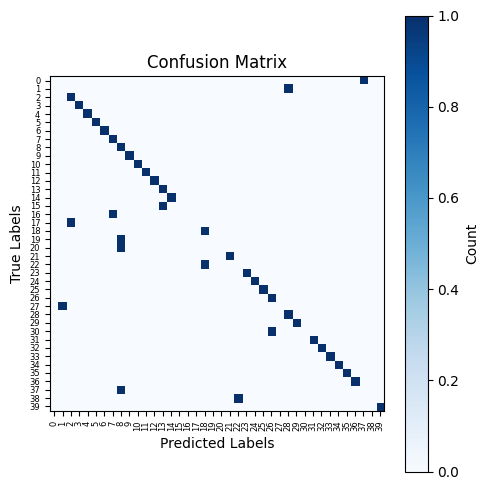

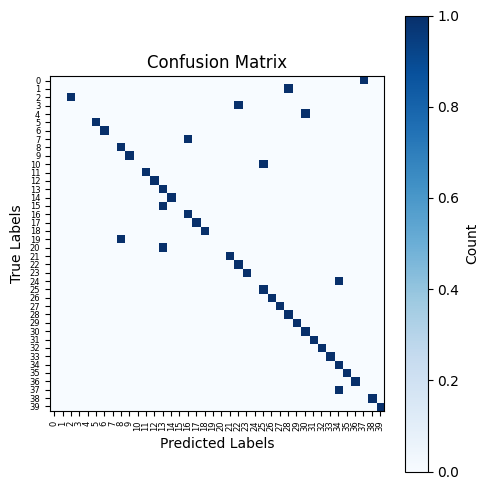

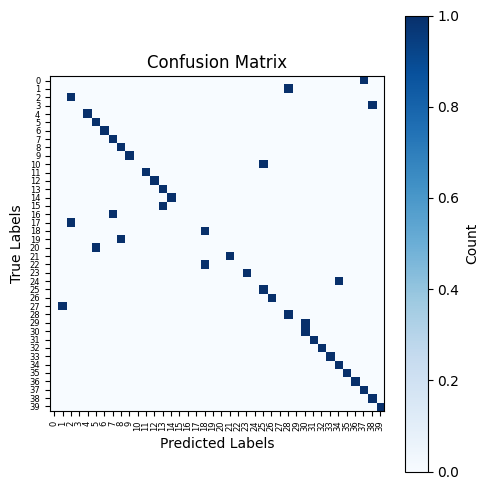

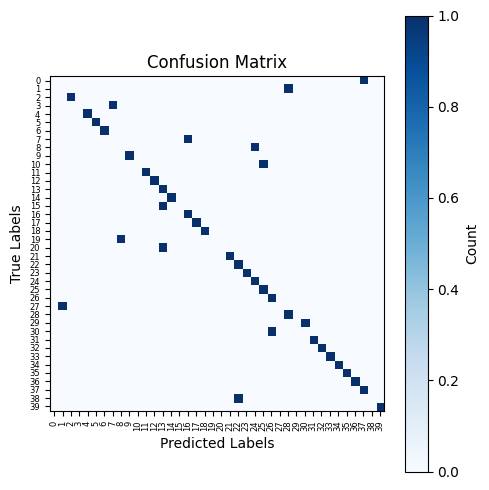

Learning rate set to 0.074325
0:	learn: 3.5503287	total: 21.5ms	remaining: 21.5s
1:	learn: 3.5175527	total: 45ms	remaining: 22.5s
2:	learn: 3.4861282	total: 75.1ms	remaining: 25s
3:	learn: 3.4538555	total: 98.6ms	remaining: 24.5s
4:	learn: 3.4151135	total: 121ms	remaining: 24.1s
5:	learn: 3.3785376	total: 152ms	remaining: 25.2s
6:	learn: 3.3479121	total: 177ms	remaining: 25.1s
7:	learn: 3.3051505	total: 196ms	remaining: 24.3s
8:	learn: 3.2697727	total: 218ms	remaining: 24s
9:	learn: 3.2375618	total: 240ms	remaining: 23.8s
10:	learn: 3.2009213	total: 260ms	remaining: 23.4s
11:	learn: 3.1706098	total: 277ms	remaining: 22.8s
12:	learn: 3.1381315	total: 293ms	remaining: 22.3s
13:	learn: 3.1089934	total: 309ms	remaining: 21.8s
14:	learn: 3.0746658	total: 325ms	remaining: 21.4s
15:	learn: 3.0443227	total: 341ms	remaining: 21s
16:	learn: 3.0130414	total: 356ms	remaining: 20.6s
17:	learn: 2.9930213	total: 372ms	remaining: 20.3s
18:	learn: 2.9634348	total: 387ms	remaining: 20s
19:	learn: 2.9294

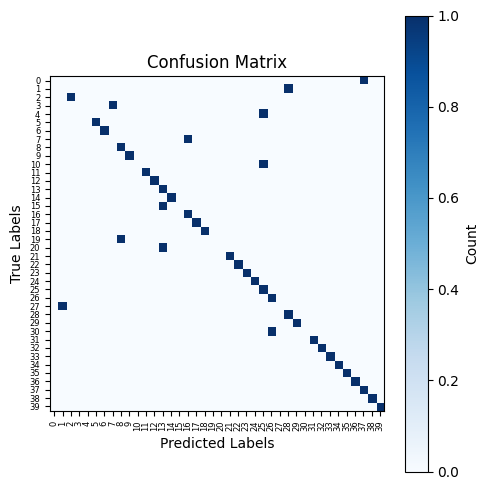

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 366
[LightGBM] [Info] Number of data points in the train set: 293, number of used features: 26
[LightGBM] [Info] Start training from score -3.115223
[LightGBM] [Info] Start training from score -4.070735
[LightGBM] [Info] Start training from score -3.600731
[LightGBM] [Info] Start training from score -4.070735
[LightGBM] [Info] Start training from score -3.041115
[LightGBM] [Info] Start training from score -3.482948
[LightGBM] [Info] Start training from score -3.377588
[LightGBM] [Info] Start training from score -3.041115
[LightGBM] [Info] Start training from score -3.600731
[LightGBM] [Info] Start training from score -4.070735
[LightGBM] [Info] Start traini

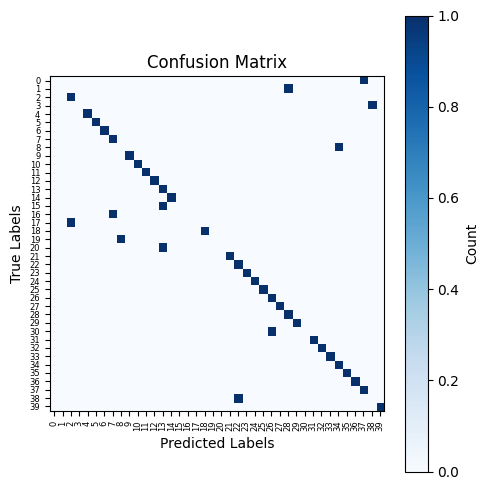

,Decision Tree,Random Forest,Gradient Boosting,HistGradientBoosting,CatBoost,LightGBM
Accuracy,0.70000,0.725000,0.675,0.675000,0.725000,0.725000
Precision,0.60625,0.616667,0.525,0.570833,0.629167,0.620833
Recall,0.70000,0.725000,0.675,0.675000,0.725000,0.725000
F1 Score,0.63500,0.650000,0.575,0.604167,0.658333,0.654167


In [26]:
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

results_data = pd.DataFrame(results)
results_data